<a href="https://colab.research.google.com/github/shailavij/ML-Projects/blob/master/Anomaly_Detection_using_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to video explaining the code - https://www.youtube.com/watch?v=0wfOOl5XtcU

In [13]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 4.0 MB/s 
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv')

In [4]:
df

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820
...,...,...
10315,2015-01-31 21:30:00,24670
10316,2015-01-31 22:00:00,25721
10317,2015-01-31 22:30:00,27309
10318,2015-01-31 23:00:00,26591


In [5]:
df['timestamp']=pd.to_datetime(df['timestamp'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  10320 non-null  datetime64[ns]
 1   value      10320 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 161.4 KB


In [7]:
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [8]:
df=df.set_index('timestamp').resample("H").mean()

In [9]:
df

,value
timestamp,
2014-07-01 00:00:00,9485.5
2014-07-01 01:00:00,5433.0
2014-07-01 02:00:00,3346.5
2014-07-01 03:00:00,2216.5
2014-07-01 04:00:00,2189.5
...,...
2015-01-31 19:00:00,28288.5
2015-01-31 20:00:00,24138.0
2015-01-31 21:00:00,24194.5


In [10]:
fig = px.line(df.reset_index(), x='timestamp', y='value', title='NYC Taxi Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [14]:
from prophet import Prophet

In [15]:
taxi_df=df.reset_index()[['timestamp','value']].rename({'timestamp':'ds','value':'y'}, axis='columns')

In [16]:
taxi_df

,ds,y
0,2014-07-01 00:00:00,9485.5
1,2014-07-01 01:00:00,5433.0
2,2014-07-01 02:00:00,3346.5
3,2014-07-01 03:00:00,2216.5
4,2014-07-01 04:00:00,2189.5
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [17]:
train=taxi_df[(taxi_df['ds'] >= '2014-07-01') & (taxi_df['ds'] <= '2015-01-27')]
test=taxi_df[(taxi_df['ds'] > '2015-01-27')]

In [18]:
train.shape

(5041, 2)

In [19]:
test.shape

(119, 2)

In [20]:
test

,ds,y
5041,2015-01-27 01:00:00,39.5
5042,2015-01-27 02:00:00,29.0
5043,2015-01-27 03:00:00,9.5
5044,2015-01-27 04:00:00,14.5
5045,2015-01-27 05:00:00,29.0
...,...,...
5155,2015-01-31 19:00:00,28288.5
5156,2015-01-31 20:00:00,24138.0
5157,2015-01-31 21:00:00,24194.5
5158,2015-01-31 22:00:00,26515.0


In [21]:
m = Prophet(changepoint_range=0.95)

In [22]:
m.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq1p06fih/vul_xd7r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq1p06fih/blv0ktfj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44120', 'data', 'file=/tmp/tmpq1p06fih/vul_xd7r.json', 'init=/tmp/tmpq1p06fih/blv0ktfj.json', 'output', 'file=/tmp/tmpq1p06fih/prophet_modelzdhpw6qn/prophet_model-20221124124501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:45:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:45:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [23]:
future = m.make_future_dataframe(periods=119,freq='H')
future.tail(167)

,ds
4993,2015-01-25 01:00:00
4994,2015-01-25 02:00:00
4995,2015-01-25 03:00:00
4996,2015-01-25 04:00:00
4997,2015-01-25 05:00:00
...,...
5155,2015-01-31 19:00:00
5156,2015-01-31 20:00:00
5157,2015-01-31 21:00:00
5158,2015-01-31 22:00:00


In [24]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5155,2015-01-31 19:00:00,23787.251851,19220.474312,28502.910166
5156,2015-01-31 20:00:00,24351.283631,19725.940005,29300.787249
5157,2015-01-31 21:00:00,23227.959429,18531.172421,27766.231081
5158,2015-01-31 22:00:00,21035.983609,16201.748329,25572.190182
5159,2015-01-31 23:00:00,18508.832870,13867.002456,23368.701540


In [25]:
results=pd.concat([taxi_df.set_index('ds')['y'],forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']]],axis=1)

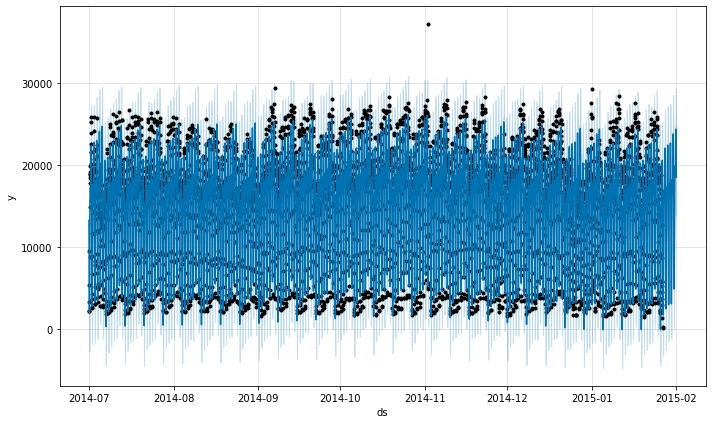

In [26]:
fig1 = m.plot(forecast)

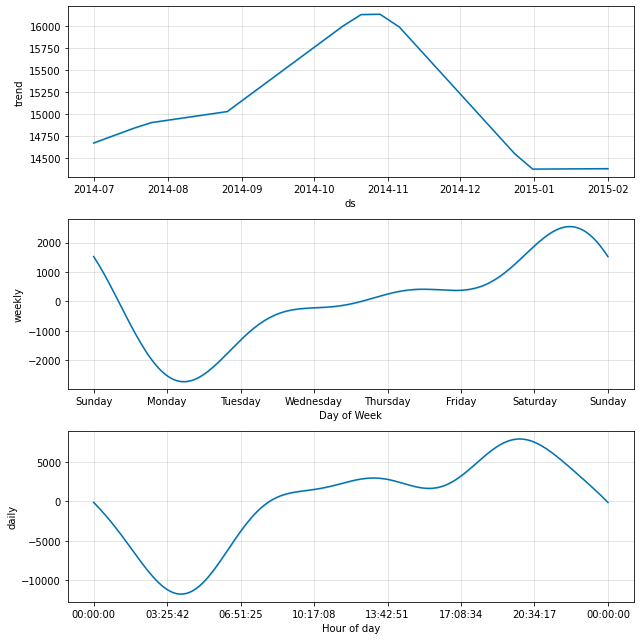

In [27]:
comp=m.plot_components(forecast)

In [28]:
results

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2014-07-01 00:00:00,9485.5,13242.228049,8228.625305,17851.122982
2014-07-01 01:00:00,5433.0,10233.968221,5375.582862,14671.333956
2014-07-01 02:00:00,3346.5,6670.549549,1863.361453,11288.986948
2014-07-01 03:00:00,2216.5,3449.448843,-1598.724952,8099.447355
2014-07-01 04:00:00,2189.5,2018.740063,-2728.106366,6934.625030
...,...,...,...,...
2015-01-31 19:00:00,28288.5,23787.251851,19220.474312,28502.910166
2015-01-31 20:00:00,24138.0,24351.283631,19725.940005,29300.787249
2015-01-31 21:00:00,24194.5,23227.959429,18531.172421,27766.231081


In [29]:
results['error'] = results['y'] - results['yhat']

In [30]:
results["uncertainty"] = results['yhat_upper'] - results['yhat_lower']

In [31]:
results

,y,yhat,yhat_lower,yhat_upper,error,uncertainty
ds,,,,,,
2014-07-01 00:00:00,9485.5,13242.228049,8228.625305,17851.122982,-3756.728049,9622.497677
2014-07-01 01:00:00,5433.0,10233.968221,5375.582862,14671.333956,-4800.968221,9295.751095
2014-07-01 02:00:00,3346.5,6670.549549,1863.361453,11288.986948,-3324.049549,9425.625494
2014-07-01 03:00:00,2216.5,3449.448843,-1598.724952,8099.447355,-1232.948843,9698.172307
2014-07-01 04:00:00,2189.5,2018.740063,-2728.106366,6934.625030,170.759937,9662.731397
...,...,...,...,...,...,...
2015-01-31 19:00:00,28288.5,23787.251851,19220.474312,28502.910166,4501.248149,9282.435853
2015-01-31 20:00:00,24138.0,24351.283631,19725.940005,29300.787249,-213.283631,9574.847245
2015-01-31 21:00:00,24194.5,23227.959429,18531.172421,27766.231081,966.540571,9235.058660


In [32]:
results[results['error'].abs() >  1.5*results['uncertainty']]

,y,yhat,yhat_lower,yhat_upper,error,uncertainty
ds,,,,,,
2014-11-02 01:00:00,37204.5,14188.424479,9420.560729,18932.071652,23016.075521,9511.510923
2015-01-01 01:00:00,29292.0,11423.718455,6862.013022,16067.015109,17868.281545,9205.002087
2015-01-01 02:00:00,25753.5,7788.226093,2674.161122,12211.462754,17965.273907,9537.301632
2015-01-01 03:00:00,22067.0,4497.042992,-273.160063,9581.618300,17569.957008,9854.778363
2015-01-26 19:00:00,4565.5,19781.388035,14957.421144,24603.909801,-15215.888035,9646.488656
2015-01-26 20:00:00,3630.5,20556.680435,15779.307213,25237.606761,-16926.180435,9458.299548
2015-01-26 21:00:00,2907.0,19657.815329,14910.463243,24367.996050,-16750.815329,9457.532807
2015-01-26 22:00:00,1324.5,17702.087166,13057.965248,22263.675135,-16377.587166,9205.709887
2015-01-26 23:00:00,243.0,15421.501925,10724.506454,20169.834796,-15178.501925,9445.328342


In [33]:
results['anomaly'] = results.apply(lambda x: 'Yes' if(np.abs(x['error']) >  1.5*x['uncertainty']) else 'No', axis=1)

In [34]:
results

,y,yhat,yhat_lower,yhat_upper,error,uncertainty,anomaly
ds,,,,,,,
2014-07-01 00:00:00,9485.5,13242.228049,8228.625305,17851.122982,-3756.728049,9622.497677,No
2014-07-01 01:00:00,5433.0,10233.968221,5375.582862,14671.333956,-4800.968221,9295.751095,No
2014-07-01 02:00:00,3346.5,6670.549549,1863.361453,11288.986948,-3324.049549,9425.625494,No
2014-07-01 03:00:00,2216.5,3449.448843,-1598.724952,8099.447355,-1232.948843,9698.172307,No
2014-07-01 04:00:00,2189.5,2018.740063,-2728.106366,6934.625030,170.759937,9662.731397,No
...,...,...,...,...,...,...,...
2015-01-31 19:00:00,28288.5,23787.251851,19220.474312,28502.910166,4501.248149,9282.435853,No
2015-01-31 20:00:00,24138.0,24351.283631,19725.940005,29300.787249,-213.283631,9574.847245,No
2015-01-31 21:00:00,24194.5,23227.959429,18531.172421,27766.231081,966.540571,9235.058660,No


In [35]:
fig = px.scatter(results.reset_index(), x='ds', y='y', color='anomaly', title='NYC Taxi Demand')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

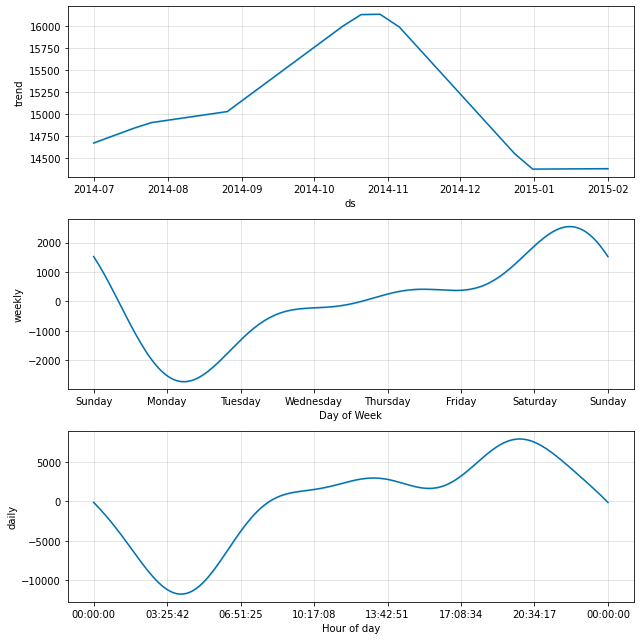

In [36]:
comp=m.plot_components(forecast)